# Radio Mini Course Assignment 2

I'm going to do this in 1D because Cameron said it was easier, I can always go back and try the 2D version if I need to.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arraylen = 10001 #A modern computer can do an FFT on a 10000 element array in no time at all.
sky1D = np.zeros(arraylen)

#putting a 1 somewhere totally random in the list
rand1=np.random.randint(0,40)
sky1D[rand1]=1

In [3]:
weights = np.zeros(len(sky1D)) + 1. #perfect observation

The function below 

In [42]:
def interferometer1D(sky1D,weights,noise_lvl,vis_plot,phi_err,plots):
    vis1D = np.fft.fft(sky1D)
    freq = np.fft.fftfreq(len(sky1D))
    
    #creating Gaussian noise
    
    noise1 = np.random.normal(0., noise_lvl, int(arraylen/2.)) +np.random.normal(0., noise_lvl, int(arraylen/2.))*1j

    noise2 = np.flip(noise1)

    noise_array = np.concatenate((noise2,np.array([0]),noise1))
    
    #adding the noise to the visibilities:
    
    vis1D = np.fft.fft(sky1D) + noise_array
    
    if vis_plot == True:
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(17,7))
        plt.tight_layout()
        plt.subplot(121)
        plt.title("Real Visibilities")
        plt.plot(freq,vis1D,alpha=0.8,linewidth = 3,color='#c51b8a')
        plt.grid()
        plt.xlabel(r'Freq',fontsize=25)
        plt.subplot(122)
        plt.title("Complex Visibilities")
        plt.plot(freq,vis1D, alpha=0.8,linewidth = 3,color='#fa9fb5')
        plt.xlabel(r'Freq',fontsize=25)
        plt.legend(fontsize=20)
        plt.grid()
        plt.tick_params(labelsize=20)
        plt.show()
        
    phi_err_1 = np.linspace(-phi_err,phi_err,int(arraylen/2.))
    phi_err_2 = np.linspace(phi_err,-phi_err,int(arraylen/2.)) #to make it hermitian

    phi_err_arr = np.radians(np.concatenate((phi_err_1,np.array([10]),phi_err_2))) #probably want this in rad
    
    
    #defining phase and amplitude
    phase = np.angle(vis1D)*np.exp(1j*phi_err_arr)
    amp = np.sqrt(np.real(vis1D)**2.+np.imag(vis1D)**2.)
    
    product = vis1D*weights
    image1D = np.fft.ifft(product)
    synth_beam = np.fft.ifft(weights)
    
    if plots == True:
        #plotting the amplitude and phase of the visibilite
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(16,19))
        plt.tight_layout()
        #plt.suptitle("Simulated 1D Interferometer",fontsize=30)

        plt.subplot(321)
        plt.plot(sky1D,linewidth=4,c='#01665e')
        plt.title('Sky',fontsize=20)
        plt.xlabel('Sky Index',fontsize=15)
        plt.grid()
        plt.tick_params(labelsize=20)

        plt.subplot(322)
        plt.title("Visibility Amplitude",fontsize=20)
        plt.plot(freq,amp,linewidth = 3, alpha=0.9,c='#c51b7d')
        plt.xlabel(r'Frequency',fontsize=15)
        plt.tick_params(labelsize=20)
        plt.grid()

        plt.subplot(323)
        plt.title("Visibility Phase",fontsize=20)
        plt.plot(freq,phase,'.',c='#4d9221')
        plt.xlabel(r'Frequency',fontsize=15)
        #plt.legend(fontsize=20)
        plt.tick_params(labelsize=20)
        plt.grid()

        #PLOTTING THE WEIGHT FUNCTION
        plt.subplot(324)
        plt.title("Weight Function",fontsize=20)
        plt.plot(freq,weights,'.',linewidth=4,c='#b2182b')
        plt.xlabel('Frequency',fontsize=15)
        plt.tick_params(labelsize=20)
        plt.grid()

        #plotting the amplitude and phase of the visibilites
        plt.subplot(325)
        plt.title("Synthesized Beam (freq axis zoom in)",fontsize=20)
        plt.plot(freq,synth_beam,color='#542788',linewidth=2,alpha=0.9)
        plt.xlabel(r'Frequency',fontsize=15)
        plt.tick_params(labelsize=20)
        plt.xlim((-0.01,0.01))
        plt.grid()

        plt.subplot(326)
        plt.plot(image1D,linewidth=4,c='#b35806',alpha=0.9)
        plt.title(r'Final Image',fontsize=20)
        plt.xlabel(r'Sky Index',fontsize=15)
        plt.tick_params(labelsize=20)
        plt.grid()

        plt.show()
    return vis1D, phase, amp, image1D, synth_beam,freq


# NOW I WILL PUT ONE ONE PLOTTING FUNCTIONS

# Part 1

### First test case: delta function at the center of the image, with perfect sampling. How does the Fourier transform compare to the theoretical expectation?

In [43]:
sky1D_a = np.zeros(arraylen)

sky1D_a[int(np.around(arraylen/2.))] = 1.
weights_a = weights #perfect weights

no_noise = 0.


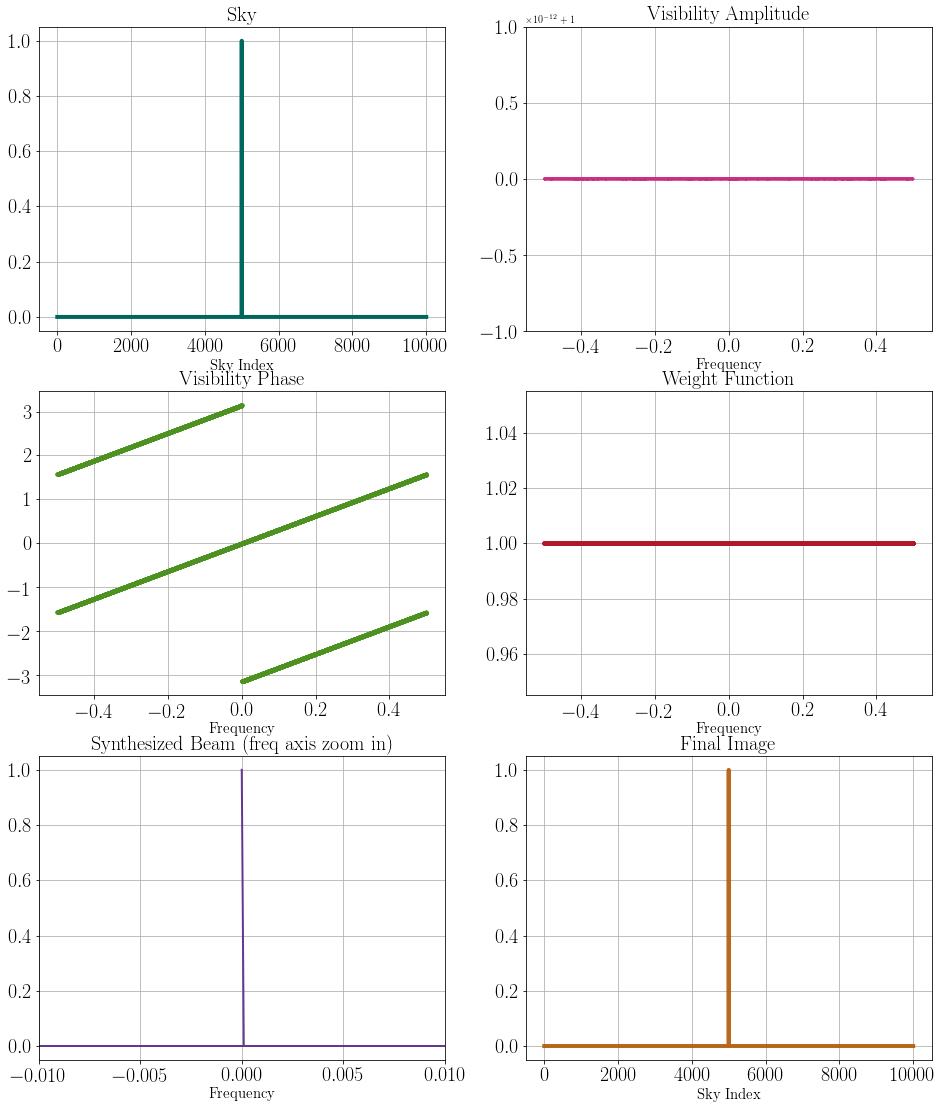

In [44]:
vis1D_a, phase_a, amp_a, image1D_a, synth_beam_a, _ = interferometer1D(sky1D_a,weights_a,no_noise,False,0.,True)

How does this compare to the theoretical expectation

# Part 2

### Shifted delta function: as with the above example, but move the delta function a few pixels in some direction (again, perfect uniform sampling). How does this change things, and does it match Fourier transform theory? Play with moving the delta function by different amounts and in different directions. Any thoughts about what this implies for sources very far from the center of an observation?

In [45]:
sky1D_b = np.zeros(arraylen)

sky1D_b[int(np.around(arraylen/2.))+1] = 1.
weights_b = weights #perfect weights

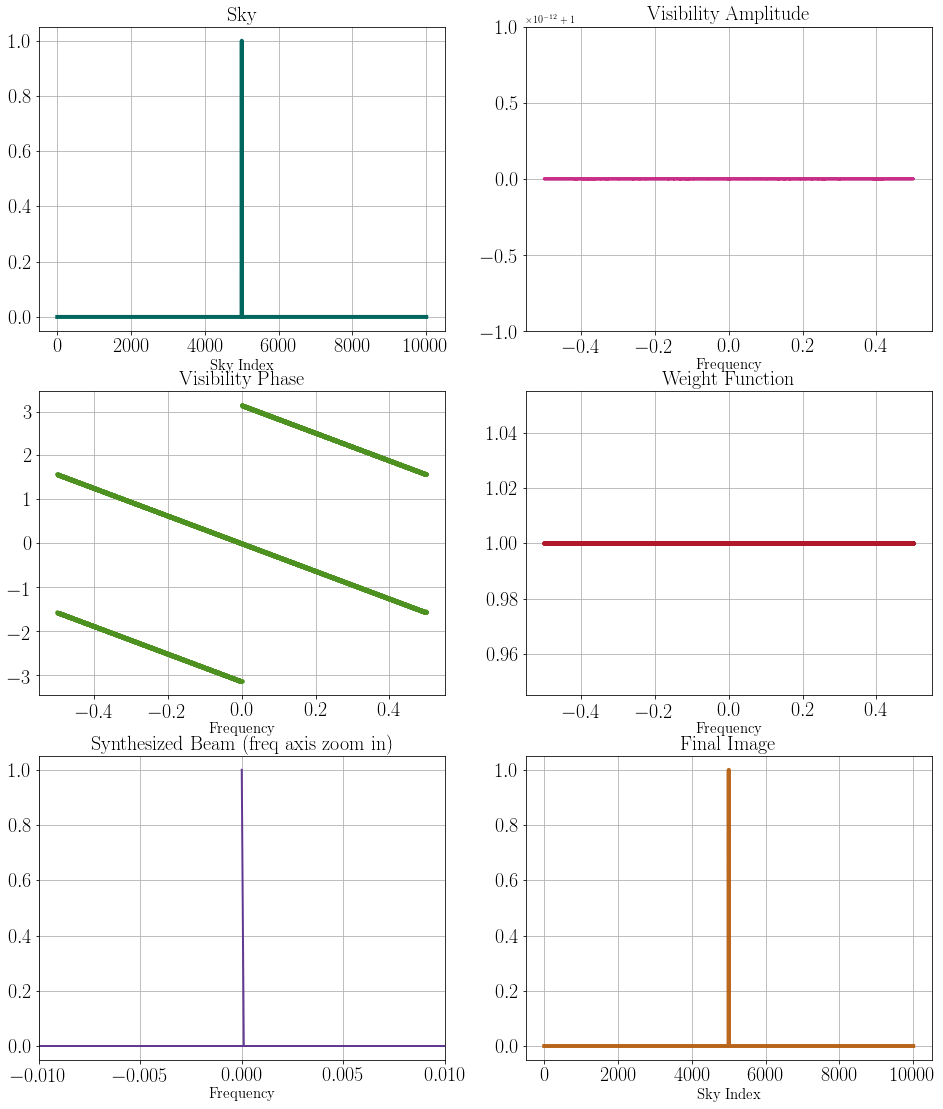

In [46]:
vis1D_b, phase_b, amp_b, image1D_b, synth_beam_b, _ = interferometer1D(sky1D_b,weights_b,no_noise,False,0.,True)

In [47]:
sky1D_b = np.zeros(arraylen)

sky1D_b[int(np.around(arraylen/2.))+3000] = 1.
weights_b = weights #perfect weights

In [48]:
vis1D_b, phase_b, amp_b, image1D_b, synth_beam_b, _ = interferometer1D(sky1D_b,weights_b,no_noise,False,phi_err=0.,True)

SyntaxError: positional argument follows keyword argument (<ipython-input-48-5869b34cf104>, line 1)

# PART 3
### Single delta-function source, with some limited sampling. Put in a delta function source somewhere (position shouldn't matter). Change the weight function to remove some parts of the ​u,v​ plane. Try removing long baselines (high frequencies) and see how that affects the resulting synthesized beam. Same with removing short baselines, or the mid-length baselines. Try a very sparse measurement (very few parts sampled). Make a few comments on the behaviour of the synthesized beam.

First I will remove the long basines (these correspond to the high frequencies).  this will look more like a tophat weight function.

In [49]:
#Try removing long baselines (high frequencies)
sky1D_3 = np.zeros(arraylen)

sky1D_3[int(np.around(arraylen/2.))] = 1.


In [50]:
weights_3 = np.zeros(len(sky1D_3))

weights_3[int(np.around(arraylen/4.)):int(np.around(3.*arraylen/4.))] = 1.

norm_const = np.average(weights_3)

weights_3 = weights_3/norm_const

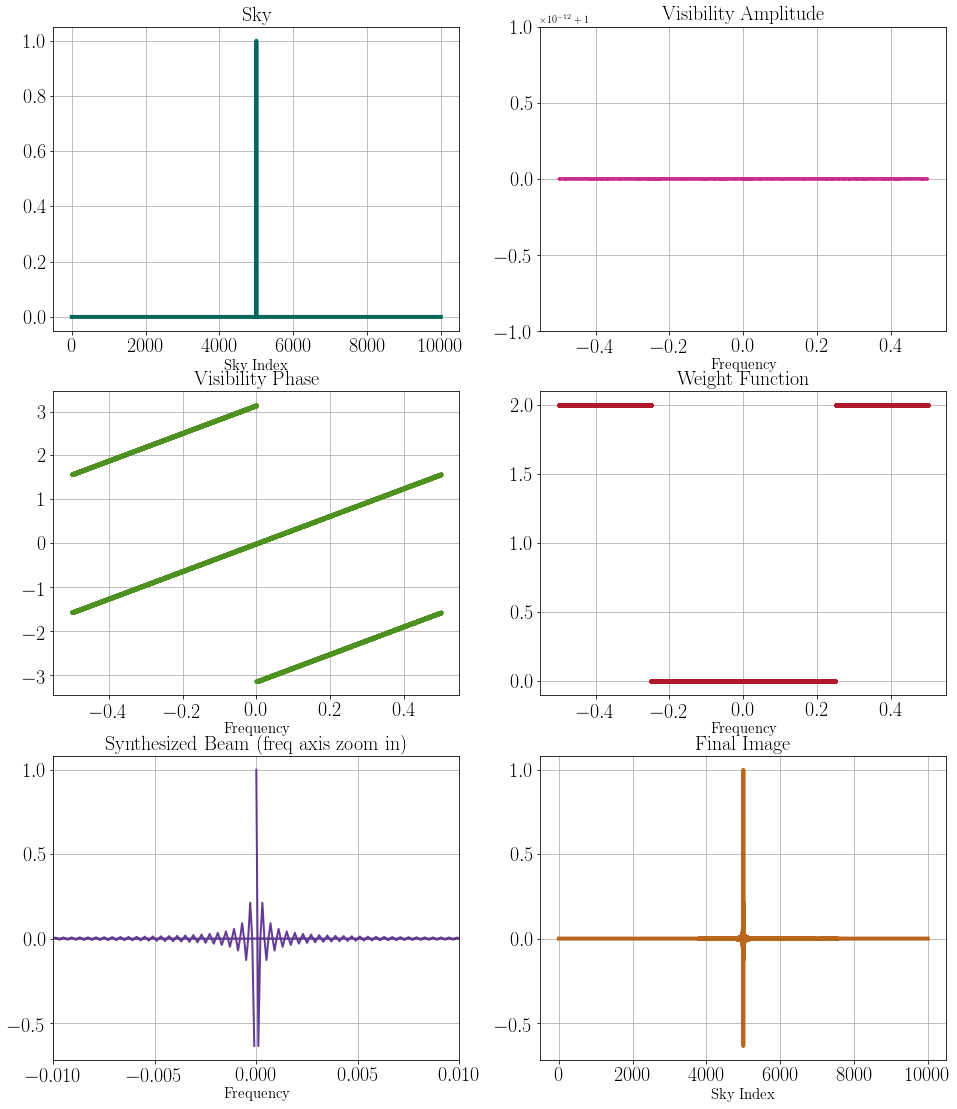

In [51]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3, _ = interferometer1D(sky1D_3,weights_3,no_noise,False,0.,True)

Now I will remove the short baselines, these correspond to the middle area of the weights.

In [52]:
weights_3b = np.zeros(len(sky1D_3))

weights_3b[:int(np.around(arraylen/4.))] = 1.

weights_3b[int(np.around(3.*arraylen/4.)):] = 1.

norm_constb = np.average(weights_3b)

weights_3b = weights_3b/norm_constb

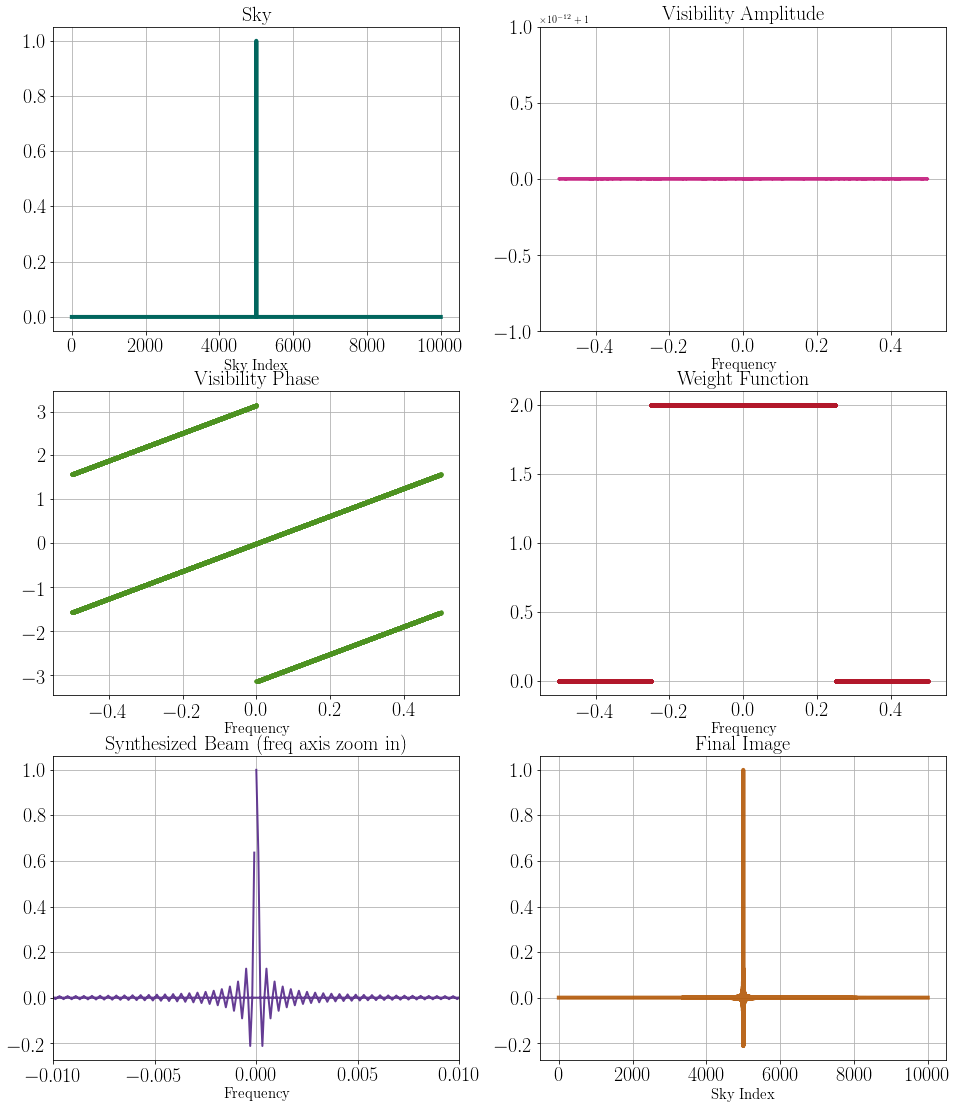

In [53]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3, _ = interferometer1D(sky1D_3,weights_3b,no_noise,False,0.,True)

# Part 4. 

Let's look at extended sources now. Put a top-hat function in your image, and play with the weighting again as before. How do the visibilities look, and how do they change as a function of the width of the tophat (and why?)? How does the image of the top-hat look depending on what information is present/missing?

In [16]:
#Try removing long baselines (high frequencies)
sky1D_4 = np.zeros(arraylen)

sky1D_4[int(np.around(1*arraylen/4.)):int(np.around(1*arraylen/2.))] = 1.

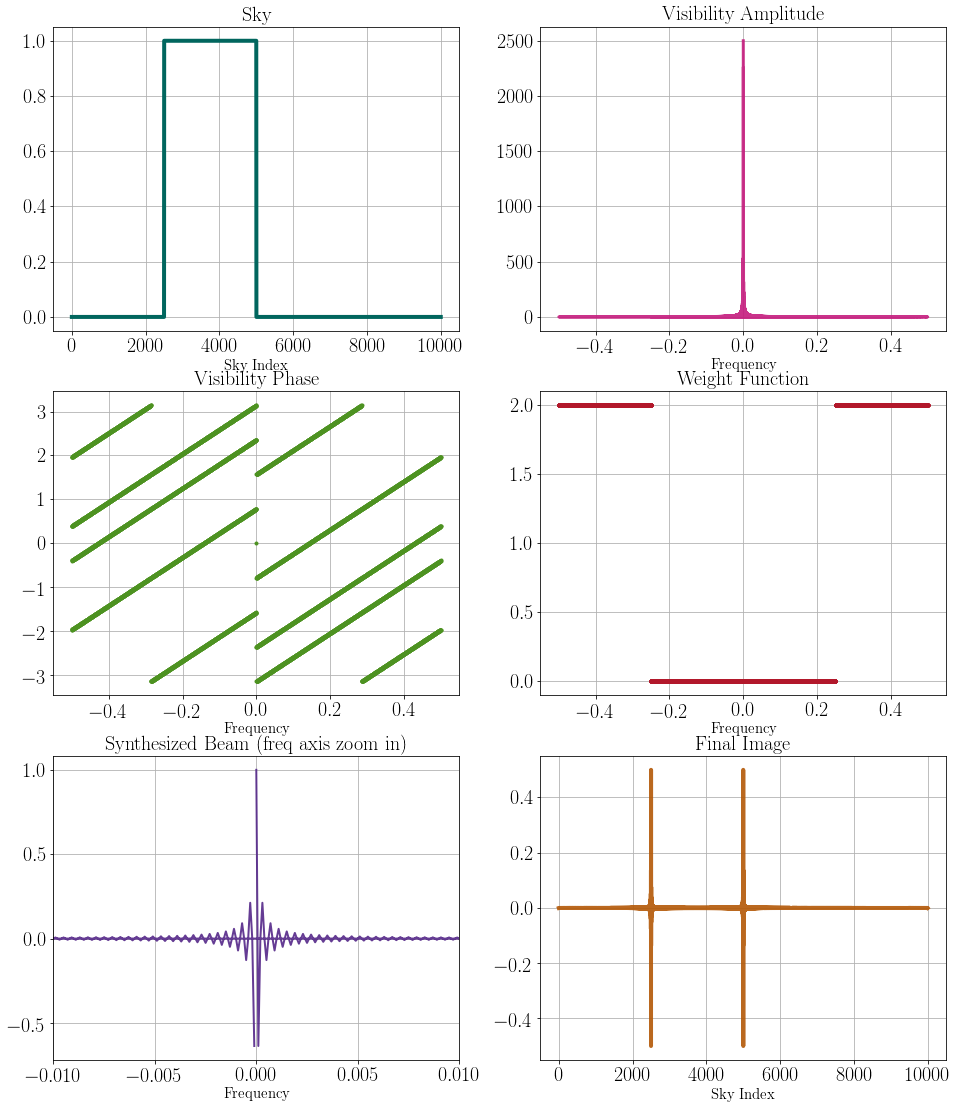

In [54]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3,freq = interferometer1D(sky1D_4,weights_3,no_noise,False,0.,True)

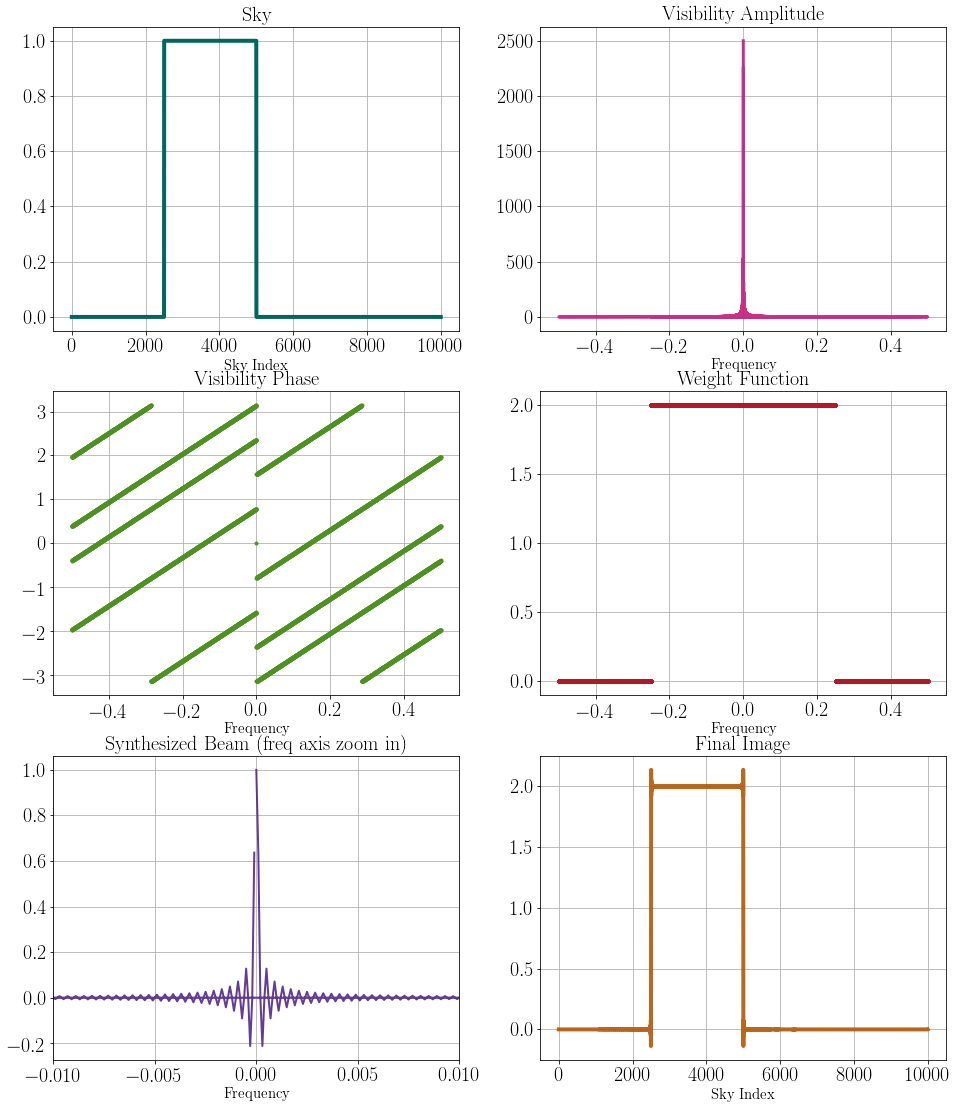

ValueError: too many values to unpack (expected 5)

In [56]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3 = interferometer1D(sky1D_4,weights_3b,no_noise,False,0.,True)

Now changing the width of the tophat to a fatter tophat!

In [19]:
#Try removing long baselines (high frequencies)
sky1D_4b = np.zeros(arraylen)

sky1D_4b[int(np.around(1*arraylen/4.)):int(np.around(3*arraylen/4.))] = 1.


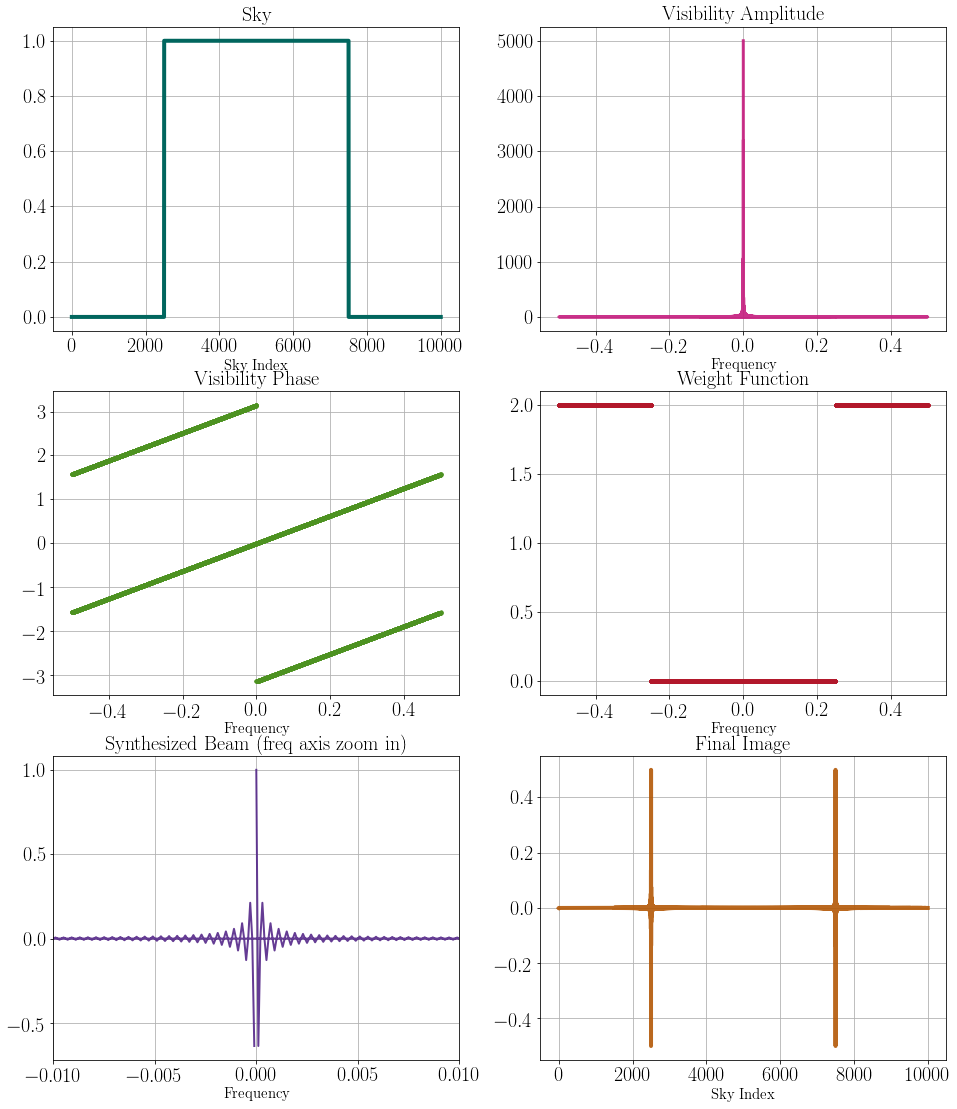

In [36]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3,freq = interferometer1D(sky1D_4b,weights_3,no_noise,False,0.,True)

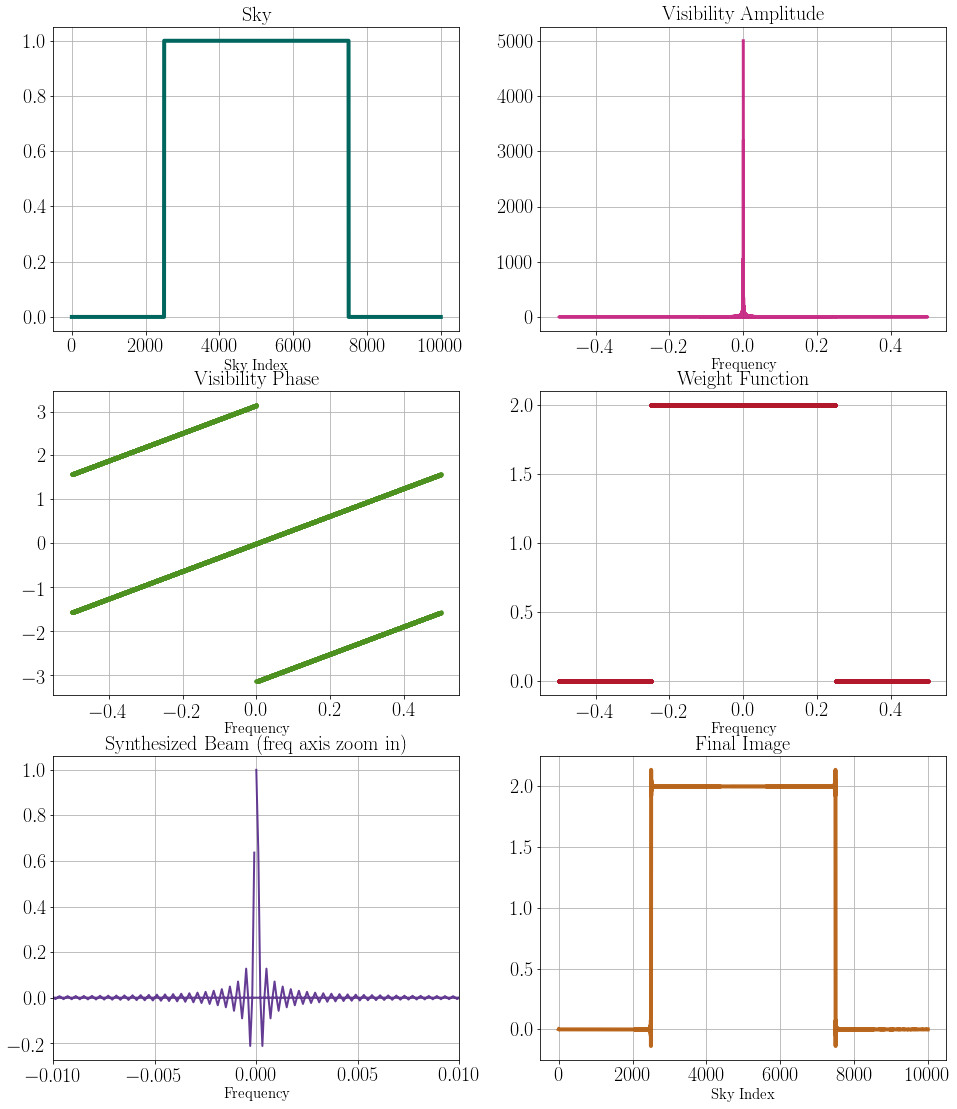

In [37]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3,freq = interferometer1D(sky1D_4b,weights_3b,no_noise,False,0.,True)

# Part 5 - Effects of Noise

### Let's start looking at the effects of noise in the visibilities. Create a sky with a delta function, and use a weighting that removes some of the shortest and longest baselines. Inject some noise into the visibilities by adding Gaussian random numbers (with some amplitude/width) at each grid point (note that noise should be hermitian, just like the data!). Comment on how the resulting image changes from the addition of noise. Also, commend on how the noise looks on small scales (adjacent pixels).

No handles with labels found to put in legend.


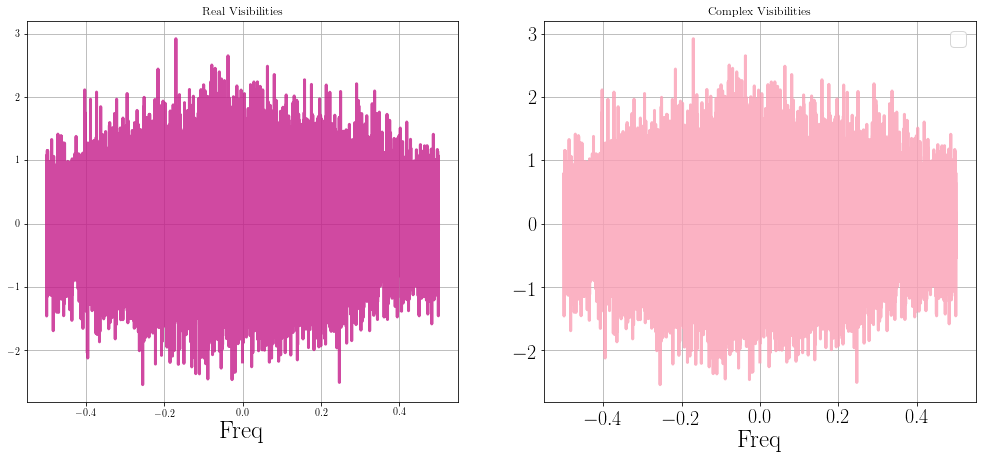

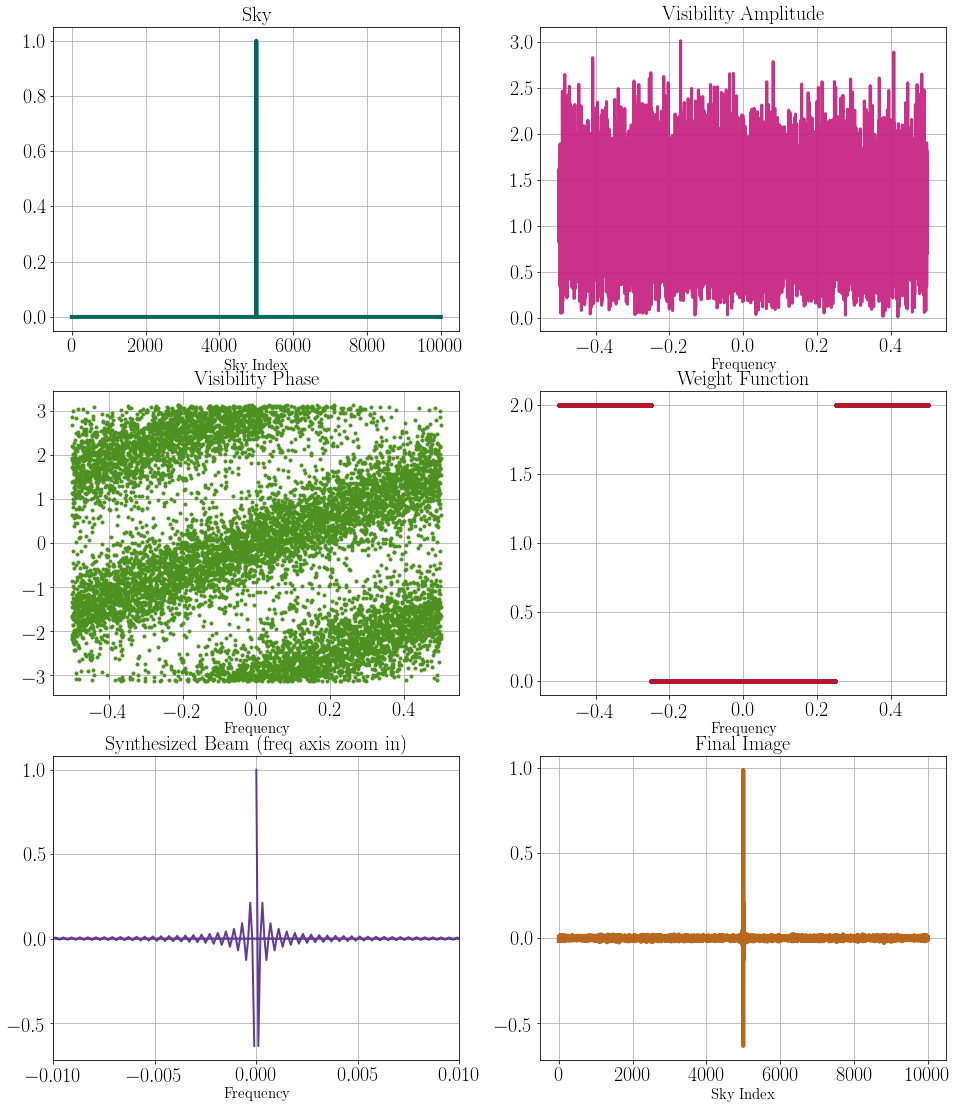

In [38]:
noise_lvl = .5
vis1D, phase, amp, image1D, synth_beam,freq = interferometer1D(sky1D_a,weights_3,noise_lvl,True,0.,True)

No handles with labels found to put in legend.


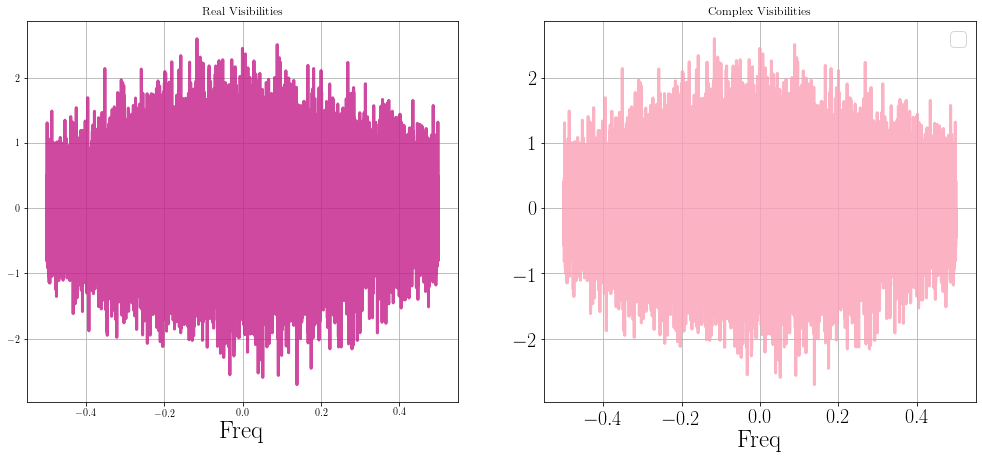

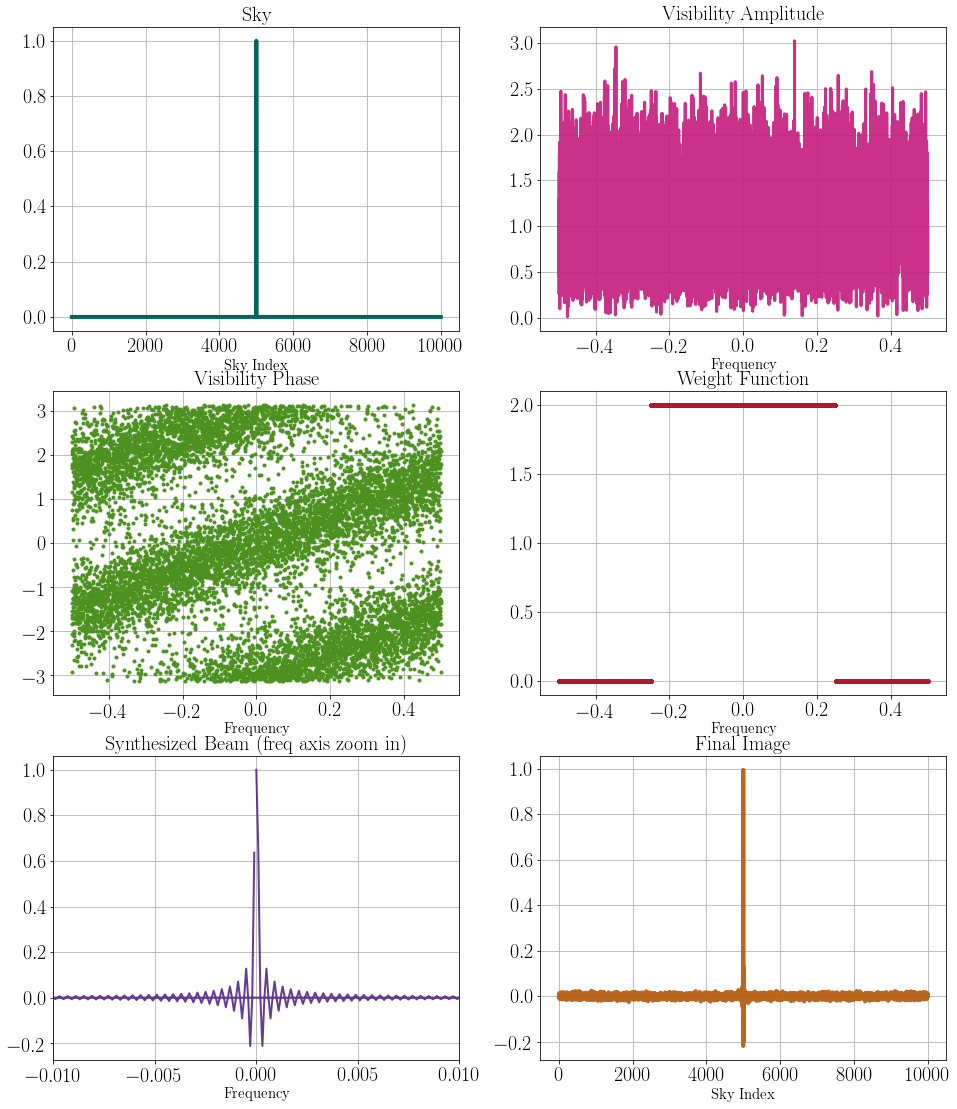

In [23]:
#OTHER WEIGHTS

noise_lvl = .5
vis1D, phase, amp, image1D, synth_beam = interferometer1D(sky1D_a,weights_3b,noise_lvl,True,0.,True)

# Part 6
### Finally, let's look at phase errors (from imperfect calibration). Again, let's start with a delta-function source and weights that remove the shortest and longest baselines. Without changing the amplitudes, introduce a random phase error (by multiplying by exp(i*phase_error)), which can be a uniform distribution of some width (say, +-10 degrees to start with). Again, make sure the visibilities are still Hermitian. Look at how the image changes as a result. Experiment with different widths of the phase error distribution to see how things change.

No handles with labels found to put in legend.


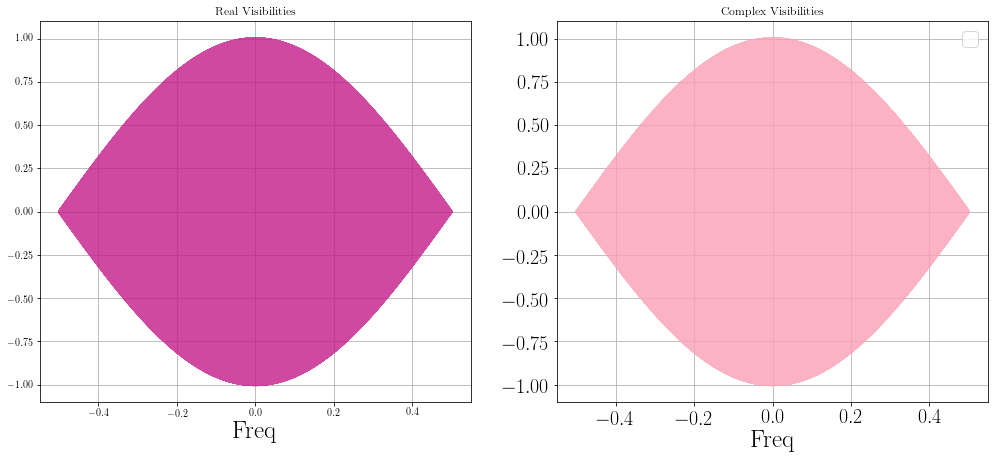

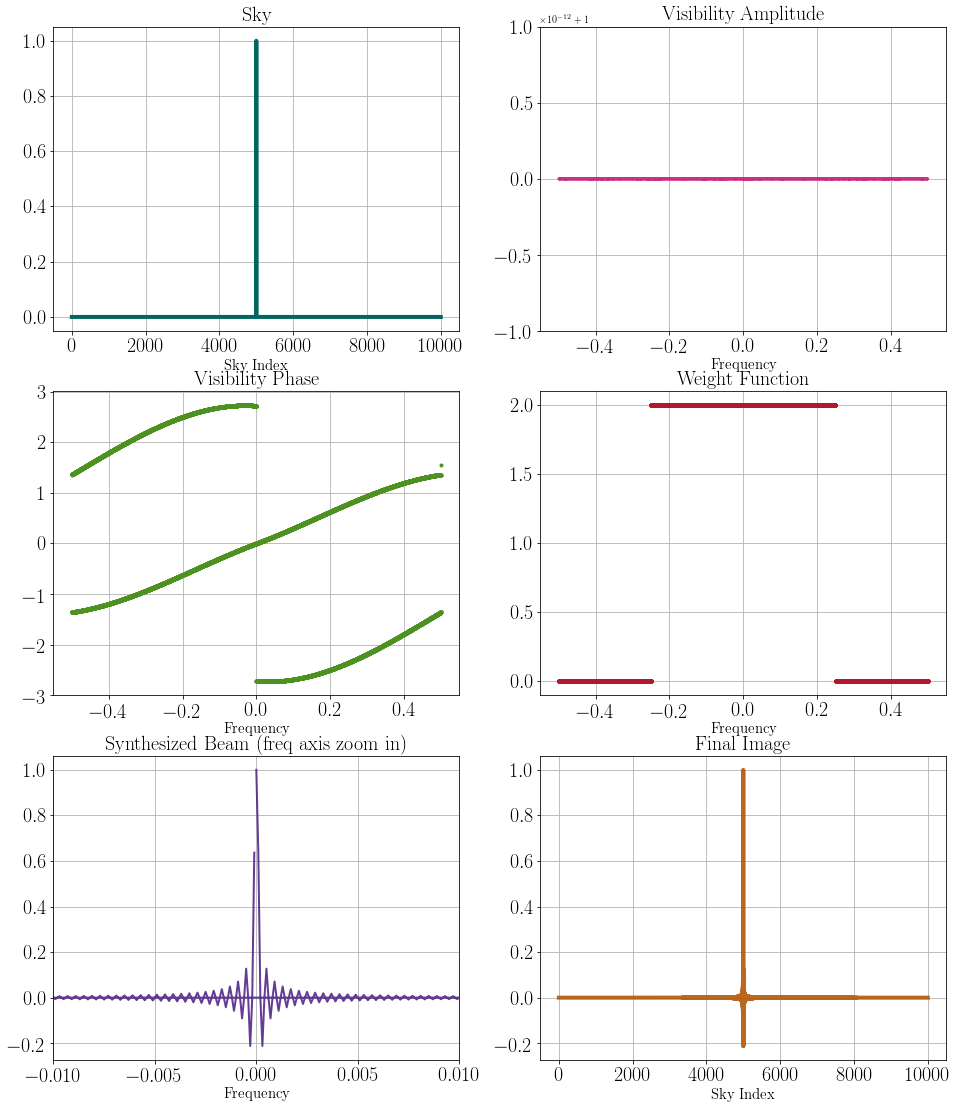

In [57]:
noise_lvl = 0.
phi_err =10.
vis1D, phase, amp, image1D, synth_beam,freq = interferometer1D(sky1D_a,weights_3b,noise_lvl,True,phi_err,True)

In [ ]:
phi_err_vals = np.arange(10,70,10)

for i in np.array(0,len(phi_err_vals)):
    vis1D, phase, amp, image1D, synth_beam,freq = interferometer1D(sky1D_a,weights_3b,noise_lvl,True,phi_err,False)
    plt.figure(figsize = (7,5))
    plt.plot(freq,phase,)
    